In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# libraries

In [2]:
# Mi working directory
import os
os.chdir(r'/Users/nicolas/Google Drive/NICOLAS_GD/python/MachineLearning/Dataset_futbol')

In [3]:
# Data importing as dataframe
players = pd.read_csv('players.csv')
players.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
# Column analysis to see with which ones i'll work
players.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [5]:
# Columns I didn't use
players.drop(['Unnamed: 0', 'ID', 'Photo', 'Flag', 'Nationality', 'Release Clause', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Jersey Number'], axis=1, inplace=True)
players.columns

Index(['Name', 'Age', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face',
       'Position', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height',
       'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [6]:
# Null checking
for i in players.isnull().sum():
    print(i)

0
0
0
0
241
0
0
0
0
48
48
48
48
48
48
48
60
1553
16943
289
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48


In [7]:
# Null dropping
players.dropna(subset=['Crossing'], axis=0, inplace=True)

In [8]:
# Data type analysis
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18159 entries, 0 to 18206
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18159 non-null  object 
 1   Age                       18159 non-null  int64  
 2   Overall                   18159 non-null  int64  
 3   Potential                 18159 non-null  int64  
 4   Club                      17918 non-null  object 
 5   Club Logo                 18159 non-null  object 
 6   Value                     18159 non-null  object 
 7   Wage                      18159 non-null  object 
 8   Special                   18159 non-null  int64  
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

In [9]:
players.shape

(18159, 56)

In [10]:
# More analysis
players.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122529,66.249904,71.319126,1597.903959,1.113222,2.947299,2.361308,49.734181,45.550911,52.298144,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.670568,6.914613,6.134420,272.862270,0.394031,0.660456,0.756164,18.364524,19.525820,17.379909,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,38.000000,30.000000,44.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,54.000000,49.000000,56.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,64.000000,62.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,93.000000,95.000000,94.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [12]:
# Longitude of data
n = len(players.columns)

<AxesSubplot:>

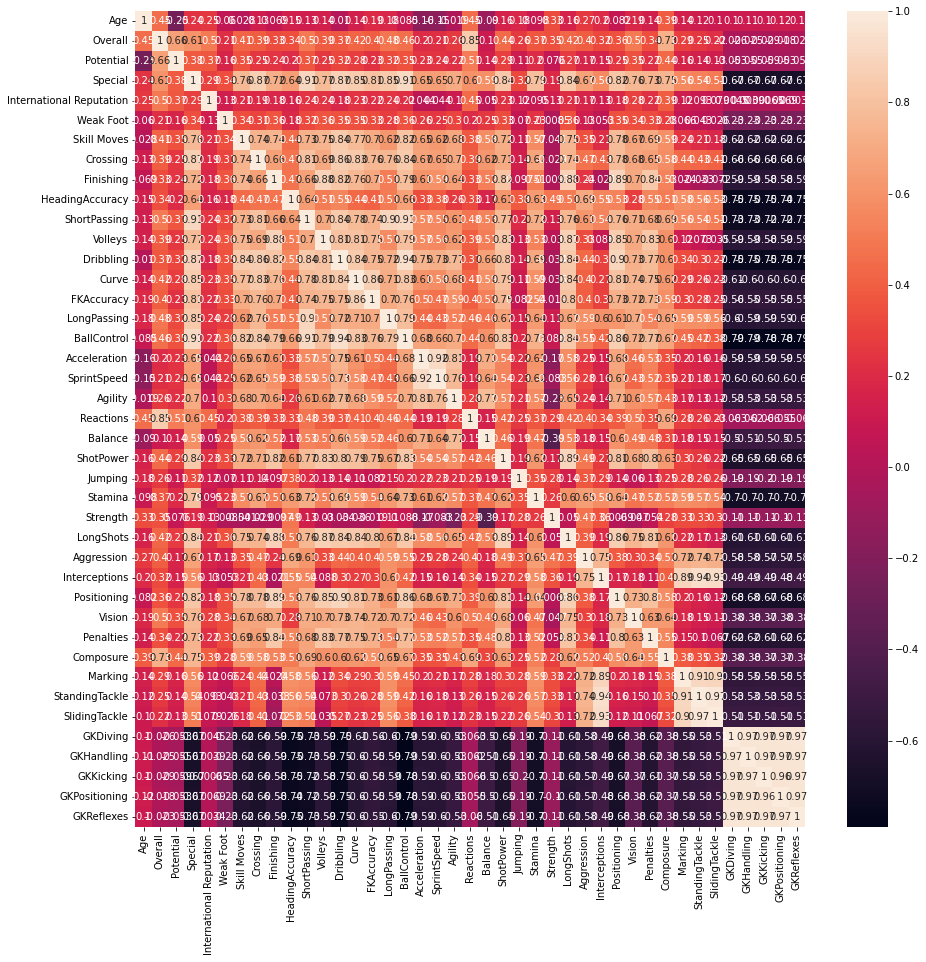

In [13]:
# Correlation analysis
correlations = players.corr()

f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(correlations, annot=True)

In [14]:
# data segmentation by type. We're only analysing numeric data
playersN = players.select_dtypes(exclude='object')

In [15]:
playersS = players.select_dtypes(include='object')

In [16]:
playersS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18159 entries, 0 to 18206
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  18159 non-null  object
 1   Club                  17918 non-null  object
 2   Club Logo             18159 non-null  object
 3   Value                 18159 non-null  object
 4   Wage                  18159 non-null  object
 5   Preferred Foot        18159 non-null  object
 6   Work Rate             18159 non-null  object
 7   Body Type             18159 non-null  object
 8   Real Face             18159 non-null  object
 9   Position              18147 non-null  object
 10  Joined                16654 non-null  object
 11  Loaned From           1264 non-null   object
 12  Contract Valid Until  17918 non-null  object
 13  Height                18159 non-null  object
 14  Weight                18159 non-null  object
dtypes: object(15)
memory usage: 2.2+ MB


In [17]:
# Let's scale the data first
scaler = StandardScaler()

playersN_scaled = scaler.fit_transform(playersN)

playersN_scaled.shape

(18159, 41)

In [18]:
playersN_scaled

array([[ 1.25844069,  4.01336435,  3.69741542, ..., -0.07465947,
        -0.14024128, -0.48516121],
       [ 1.68666591,  4.01336435,  3.69741542, ..., -0.07465947,
        -0.14024128, -0.31807333],
       [ 0.18787765,  3.72411387,  3.53439634, ..., -0.07465947,
        -0.08153585, -0.31807333],
       ...,
       [-1.95324843, -2.78402193, -0.70409989, ..., -0.37764552,
        -0.6098847 , -0.20668142],
       [-1.73913582, -2.78402193, -0.86711898, ..., -0.13525668,
        -0.49247385, -0.42946525],
       [-1.95324843, -2.92864717, -0.86711898, ..., -0.43824273,
        -0.25765214, -0.42946525]])

<function matplotlib.pyplot.show(close=None, block=None)>

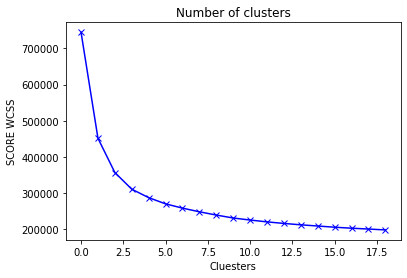

In [19]:
# We're analysisng the cost-benefit ratio to find the optimal number of cluster
score_1 = []

range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(playersN_scaled)
    score_1.append(kmeans.inertia_)

plt.plot(score_1, 'bx-')
plt.title('Number of clusters')
plt.xlabel('Cluesters')
plt.ylabel('SCORE WCSS')
plt.show

In [20]:
# We chose 8 as the optimal number of clusters
kmeans = KMeans(8)
kmeans.fit(playersN_scaled)
labels = kmeans.labels_

In [21]:
kmeans.cluster_centers_.shape

(8, 41)

In [22]:
# Cluster centers
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [playersN.columns])
cluster_centers  

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,-0.206429,-0.385439,-0.333030,0.240178,-0.284001,-0.064621,-0.136948,0.352936,-0.160463,0.056393,...,-0.183226,-0.176138,0.534578,0.611098,0.629398,-0.343038,-0.348697,-0.344407,-0.345323,-0.343697
1,0.197706,-0.238661,-0.248837,-2.021977,-0.044330,-0.692223,-1.800331,-1.931850,-1.717295,-2.182404,...,-1.817617,-1.182461,-1.610645,-1.548980,-1.483913,2.752304,2.748611,2.741765,2.738933,2.750702
2,0.685582,1.824201,1.445574,1.502614,3.098367,0.739727,1.380402,1.216628,1.179399,0.682652,...,1.261144,1.589922,0.470418,0.399829,0.307907,-0.349755,-0.357923,-0.350592,-0.346115,-0.356936
3,-0.739087,-1.136584,-0.556553,-0.766811,-0.287351,-0.392021,-0.468757,-0.591403,-0.960229,0.114669,...,-0.688661,-1.008879,0.438427,0.548004,0.575102,-0.359915,-0.362771,-0.373523,-0.360664,-0.361318
4,0.435426,0.678696,0.339467,1.027429,-0.063736,0.179583,0.559044,0.793901,0.375035,0.415461,...,0.436618,0.759785,0.897594,0.929674,0.920835,-0.334011,-0.333483,-0.333326,-0.332779,-0.333334
5,0.190425,0.470544,0.241452,0.526919,-0.169751,0.477533,0.907607,0.562684,1.042439,0.228261,...,0.863239,0.557860,-0.593311,-0.686528,-0.743528,-0.338218,-0.332593,-0.328621,-0.336759,-0.337098
6,-0.776179,-0.927283,-0.314117,-0.415331,-0.284341,-0.011207,0.000131,-0.191801,0.586352,-0.125772,...,0.415481,-0.531046,-0.848985,-0.950464,-0.915247,-0.364968,-0.360913,-0.360609,-0.360509,-0.360974
7,0.532762,0.456926,0.104891,-0.109817,-0.015620,-0.217282,-0.463880,-0.420413,-0.699799,0.968054,...,-0.408280,0.334645,1.038512,1.029510,1.013523,-0.338407,-0.334382,-0.334978,-0.331808,-0.338989


In [23]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [playersN.columns])
cluster_centers

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,24.158416,63.584818,69.276238,1663.437624,1.001320,2.904620,2.257756,56.215512,42.417822,53.278218,...,45.671287,56.633993,57.921782,60.936304,59.060396,10.546205,10.496370,10.548515,10.506601,10.539934
1,26.045903,64.599704,69.792695,1046.197927,1.095755,2.490128,1.000000,14.257651,12.020237,14.369200,...,20.005429,45.125864,15.223593,14.141658,14.071076,65.317868,62.860809,61.477789,63.044423,66.098717
2,28.324496,78.863203,80.186638,2007.899258,2.334040,3.435843,3.405090,72.076352,68.579003,64.162248,...,68.353128,76.830329,56.644751,56.359491,52.216331,10.427359,10.340403,10.446448,10.493107,10.302227
3,21.670669,58.391081,67.905089,1388.675815,1.000000,2.688393,2.006861,38.873642,26.802173,54.291023,...,37.734134,47.110921,56.008005,59.569468,57.904517,10.247570,10.258433,10.068039,10.245283,10.223556
4,27.156160,70.942693,73.401504,1878.242837,1.088109,3.065903,2.784026,64.313395,52.873567,59.518625,...,55.405086,67.337034,65.147206,67.837751,65.264685,10.705946,10.753582,10.731375,10.720272,10.726003
5,26.011897,69.503444,72.800250,1741.676268,1.046337,3.262680,3.047589,60.067314,65.904822,56.265185,...,62.104571,65.027865,35.472448,32.825297,29.832812,10.631497,10.768629,10.809017,10.652473,10.658422
6,21.497430,59.838276,69.392250,1484.578885,1.001186,2.939897,2.361408,46.211941,56.999605,50.112297,...,55.073151,52.575326,30.383551,27.107552,26.177145,10.158165,10.289838,10.281139,10.247924,10.229735
7,27.610759,69.409283,71.962553,1567.939873,1.107068,2.803797,2.010549,42.013713,31.887131,69.122363,...,42.137131,62.475211,67.952004,70.000527,67.237869,10.628165,10.738397,10.704114,10.736814,10.624473


In [24]:
labels.shape # Labels associated to each data point

(18159,)

In [25]:
# Take data and append the cluster label
players_cluster = pd.concat([players, pd.DataFrame({'cluster':labels})], axis=1)

In [26]:
players_cluster.head(20)

,Name,Age,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,cluster
0,L. Messi,31.0,94.0,94.0,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2.0
1,Cristiano Ronaldo,33.0,94.0,94.0,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,2.0
2,Neymar Jr,26.0,92.0,93.0,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,2.0
3,De Gea,27.0,91.0,93.0,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1.0
4,K. De Bruyne,27.0,91.0,92.0,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,2.0
5,E. Hazard,27.0,91.0,91.0,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,€93M,€340K,2142.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,2.0
6,L. Modrić,32.0,91.0,91.0,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,€67M,€420K,2280.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,2.0
7,L. Suárez,31.0,91.0,91.0,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€80M,€455K,2346.0,Right,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,2.0
8,Sergio Ramos,32.0,91.0,91.0,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,€51M,€380K,2201.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,2.0
9,J. Oblak,25.0,90.0,93.0,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,€68M,€94K,1331.0,Right,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,1.0


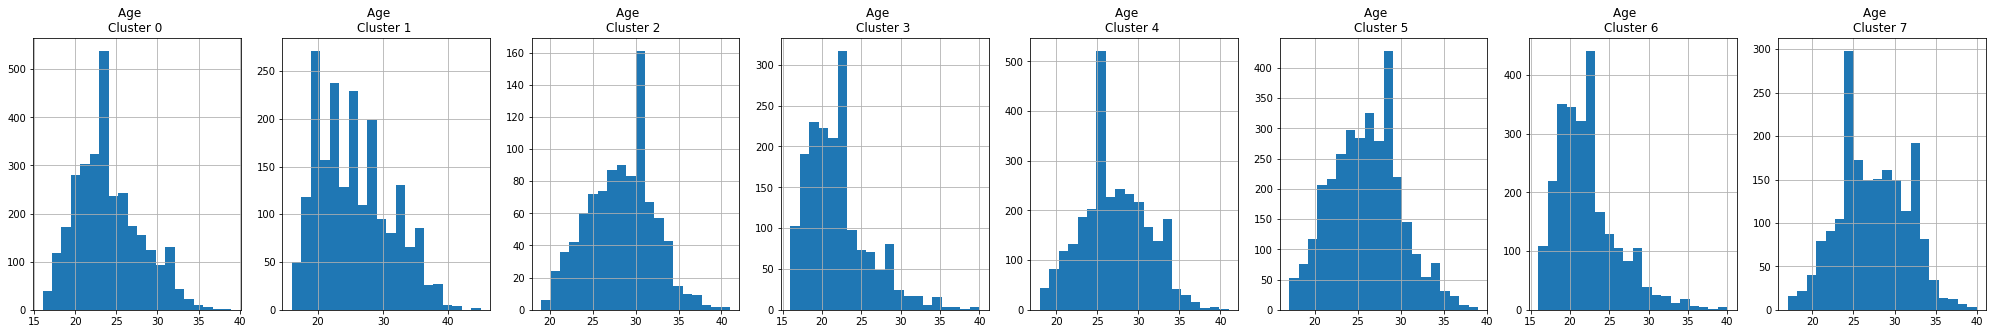

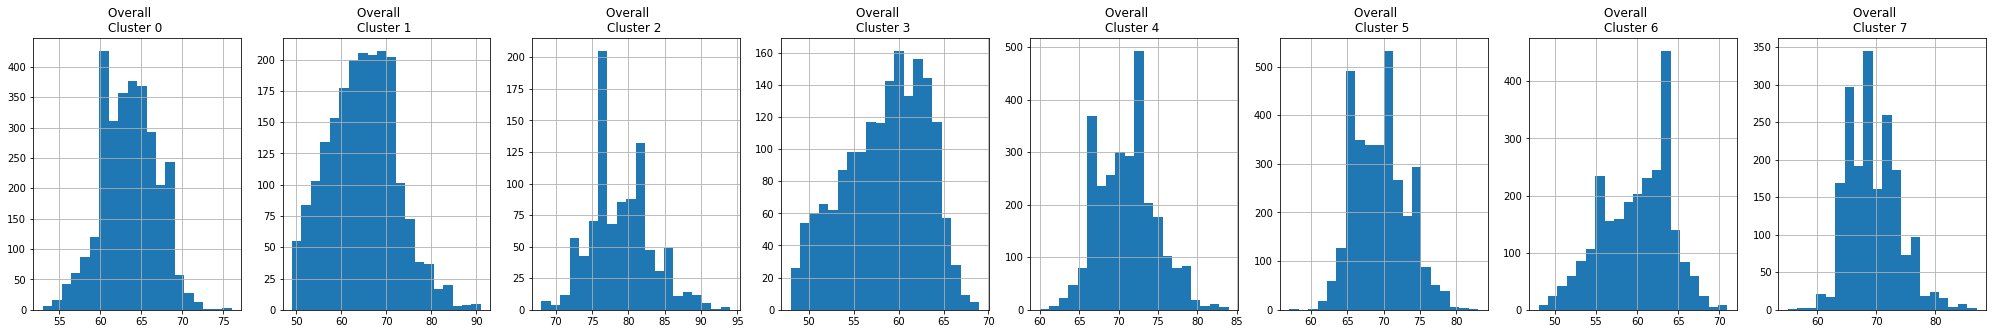

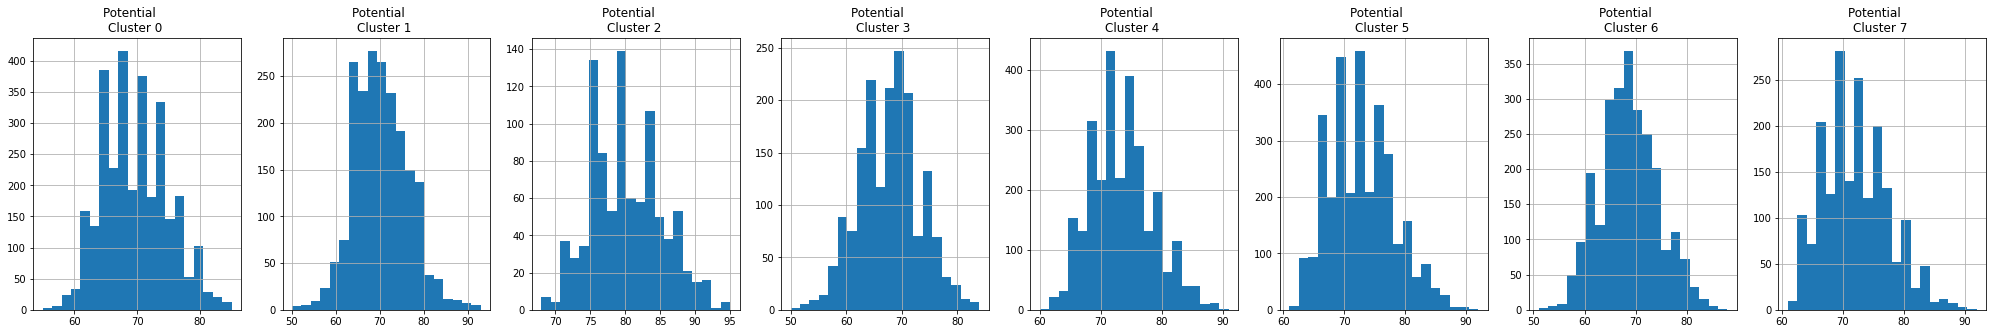

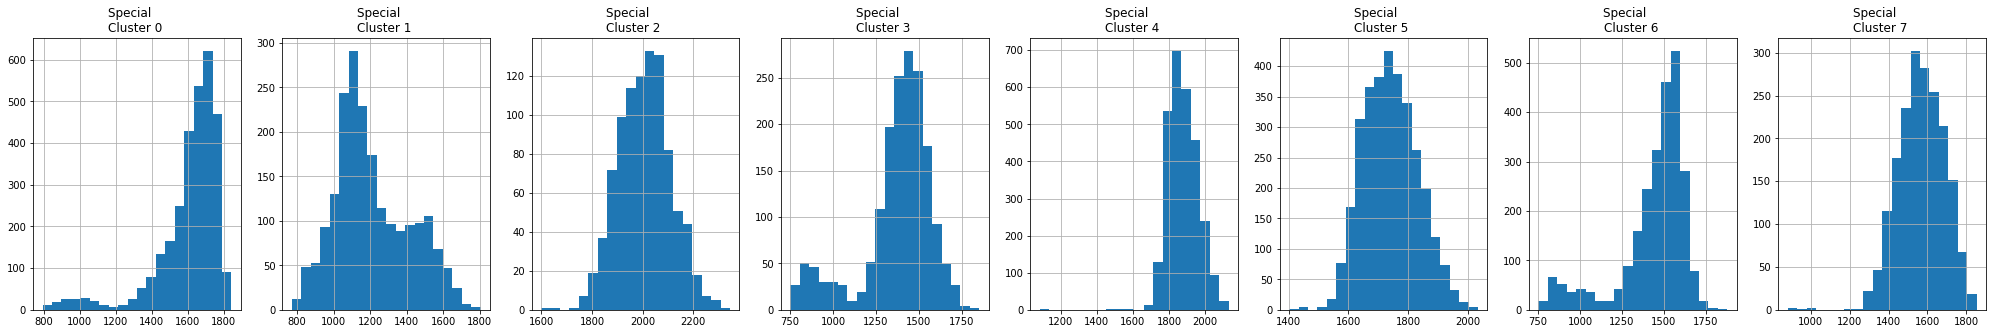

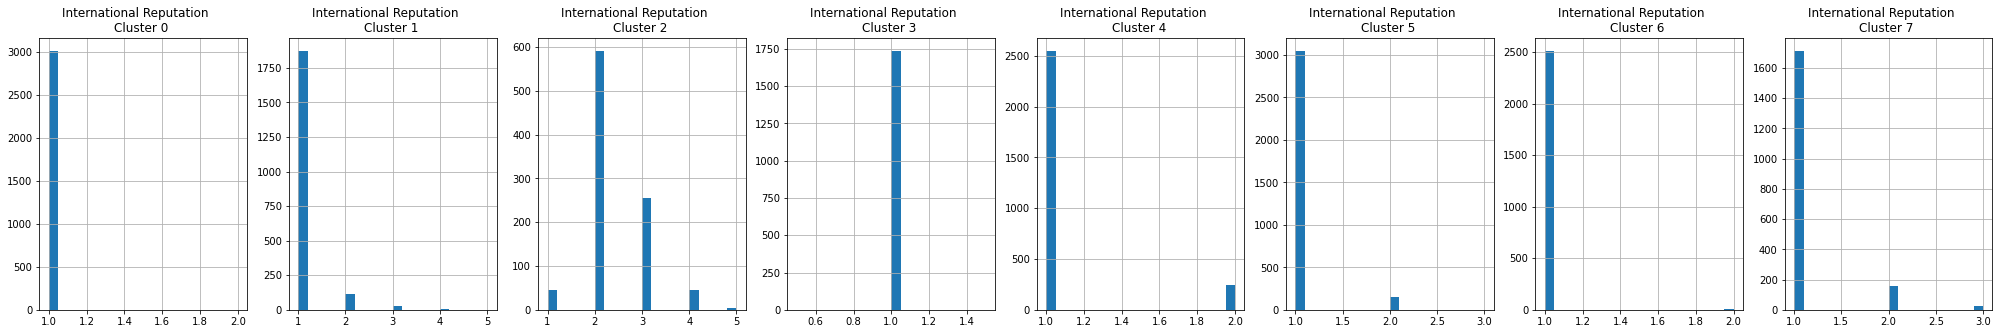

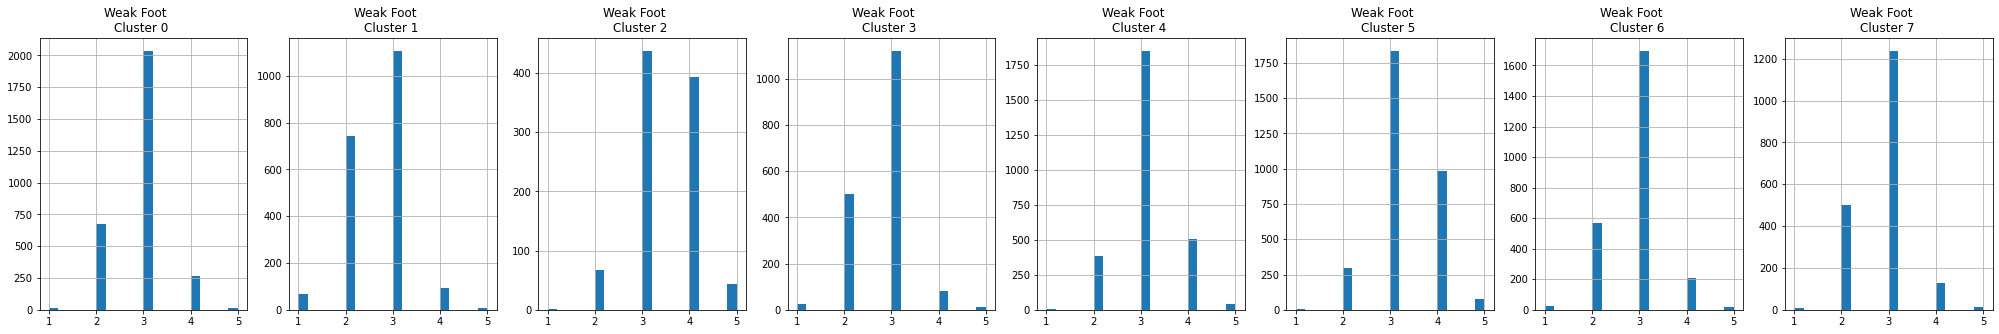

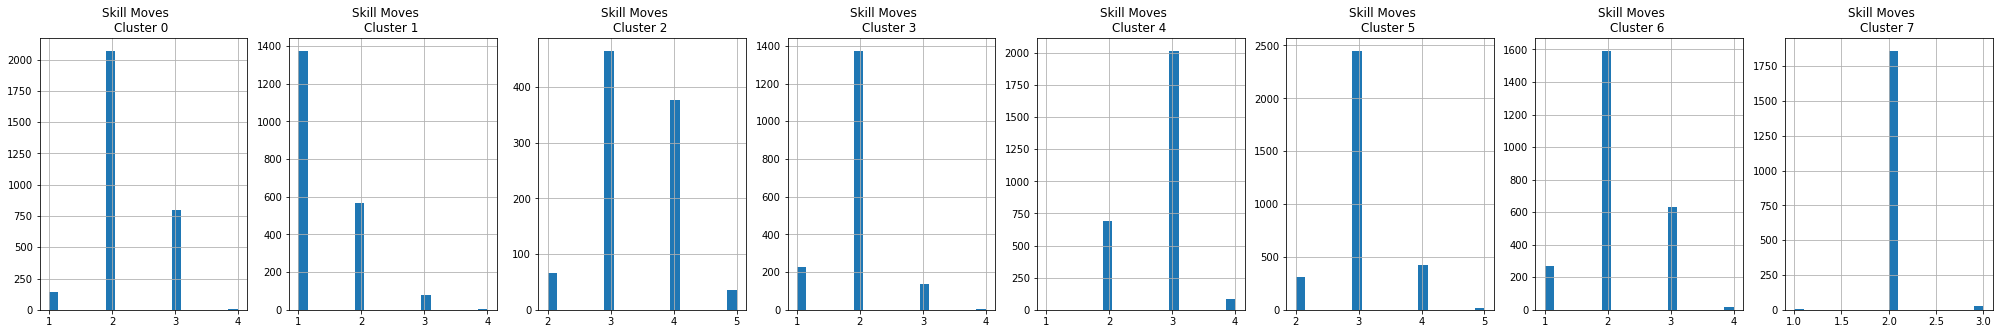

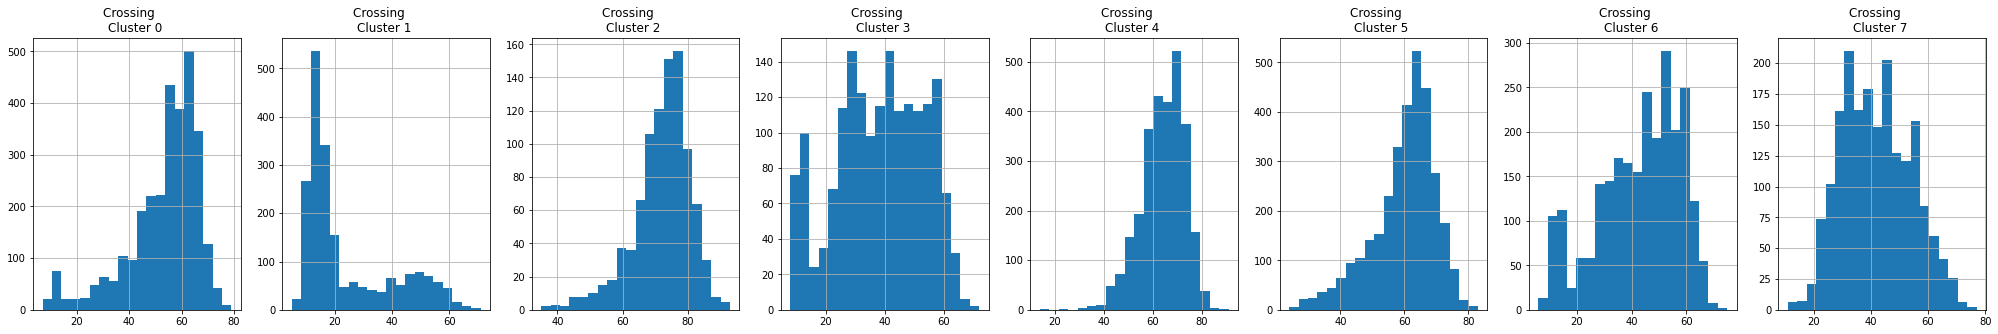

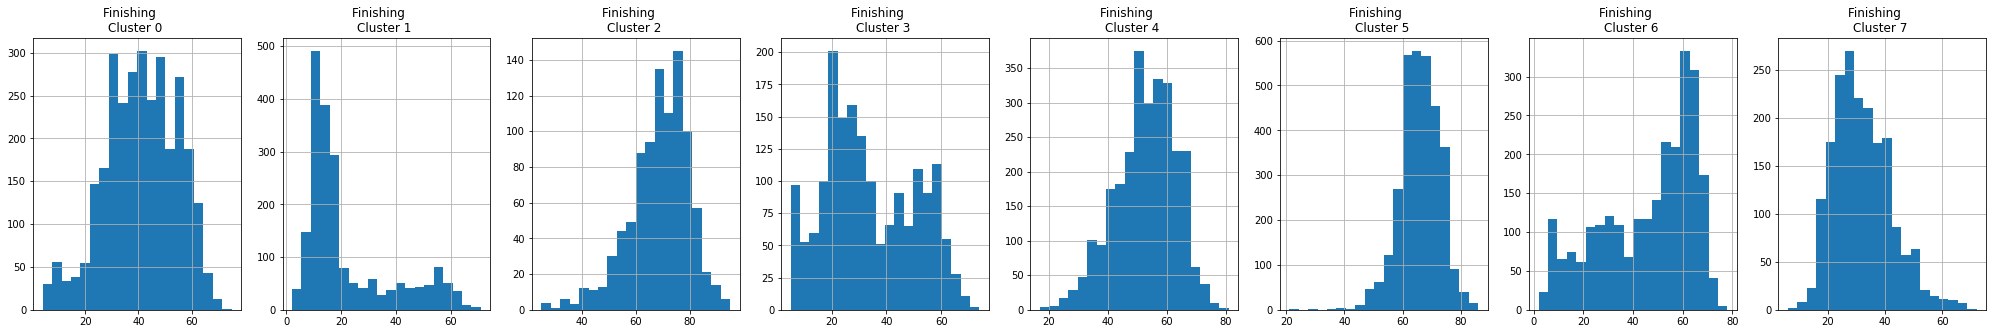

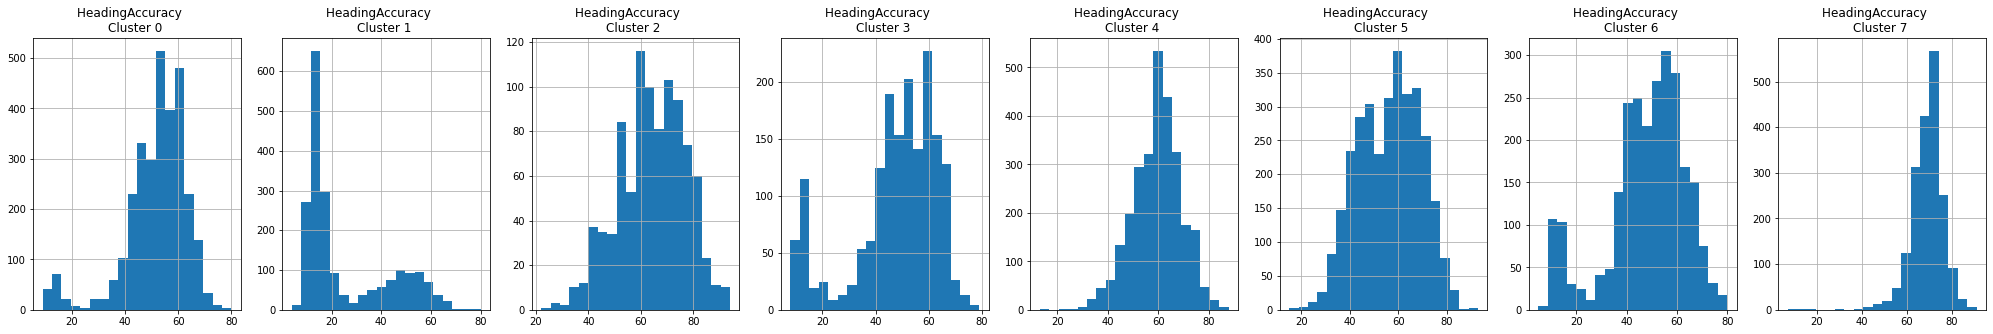

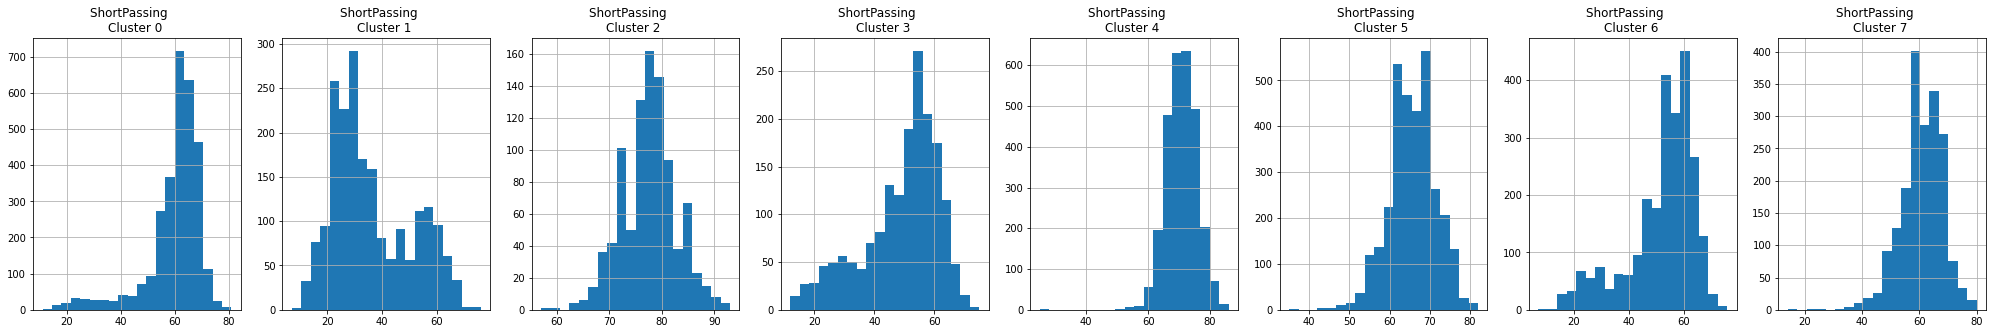

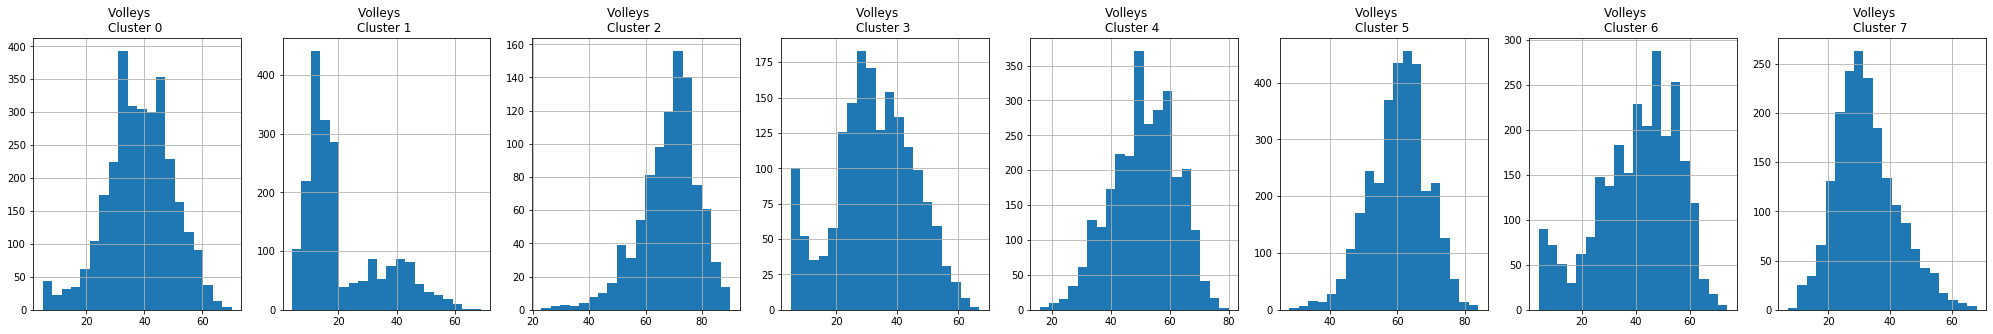

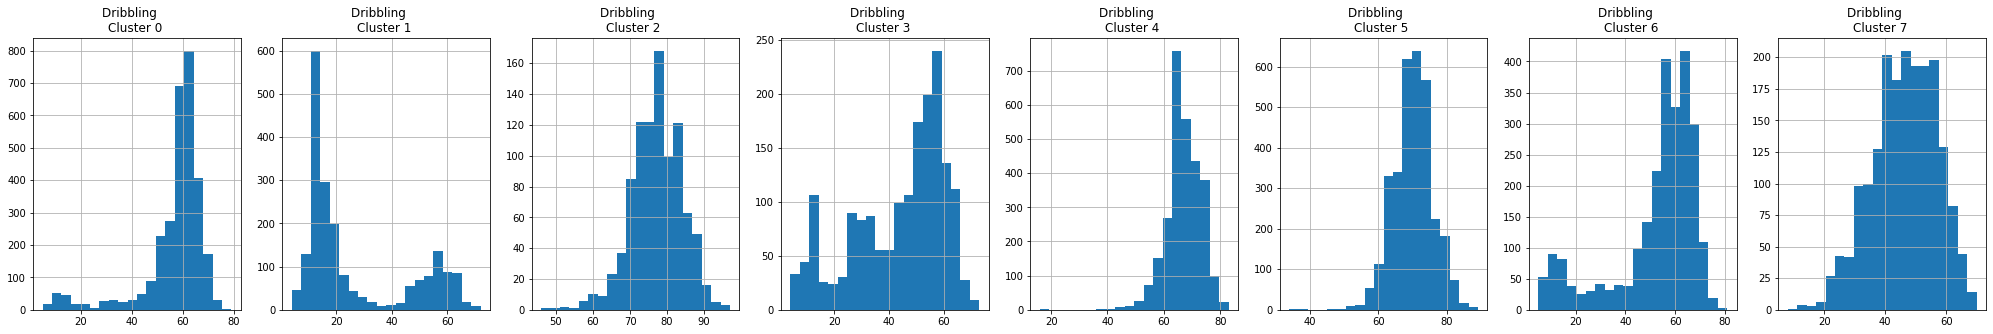

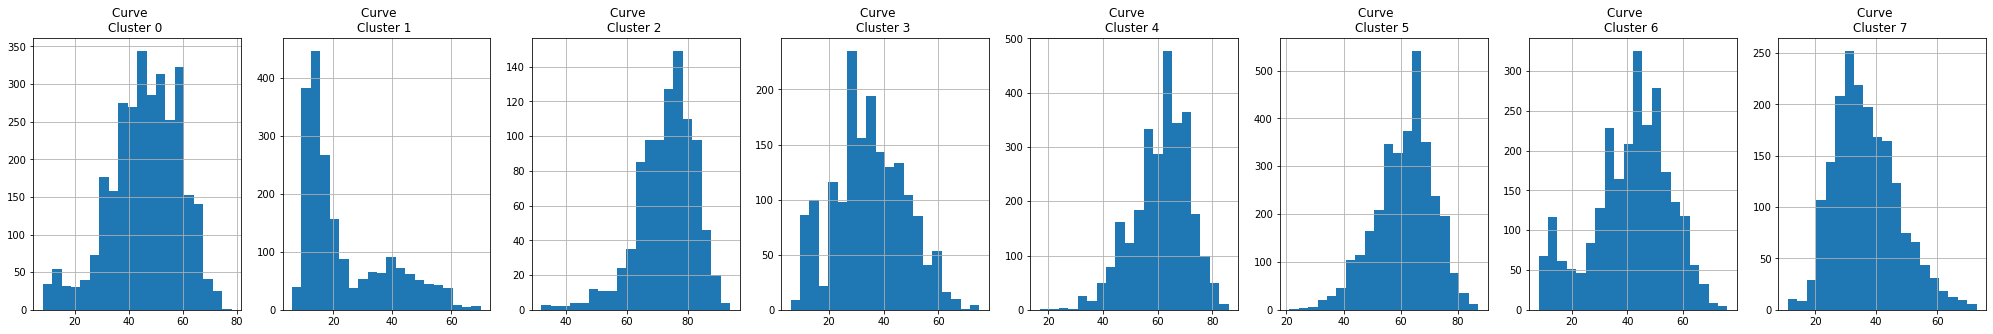

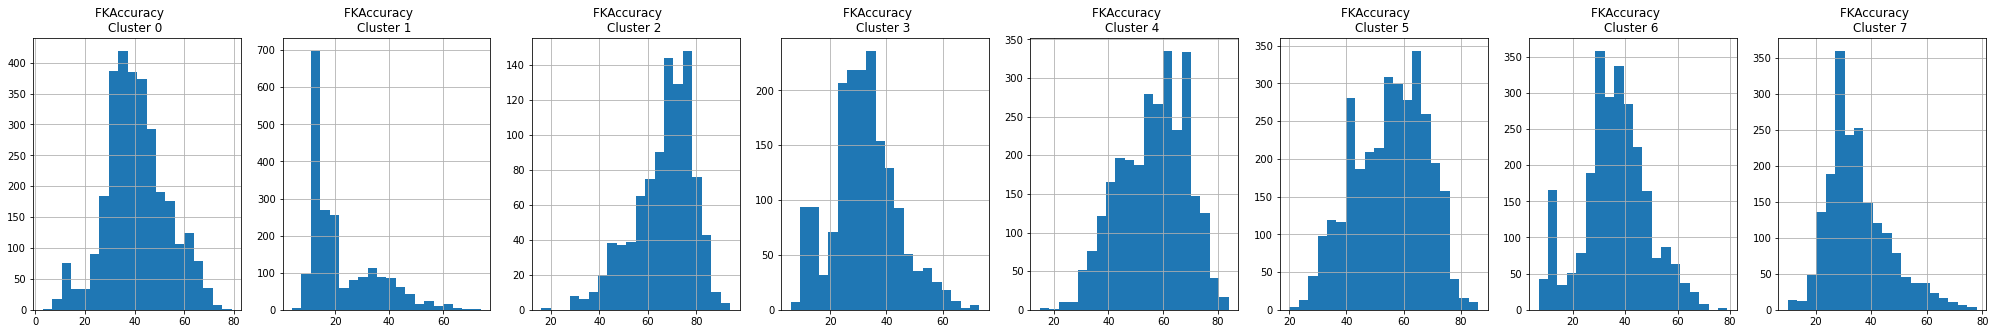

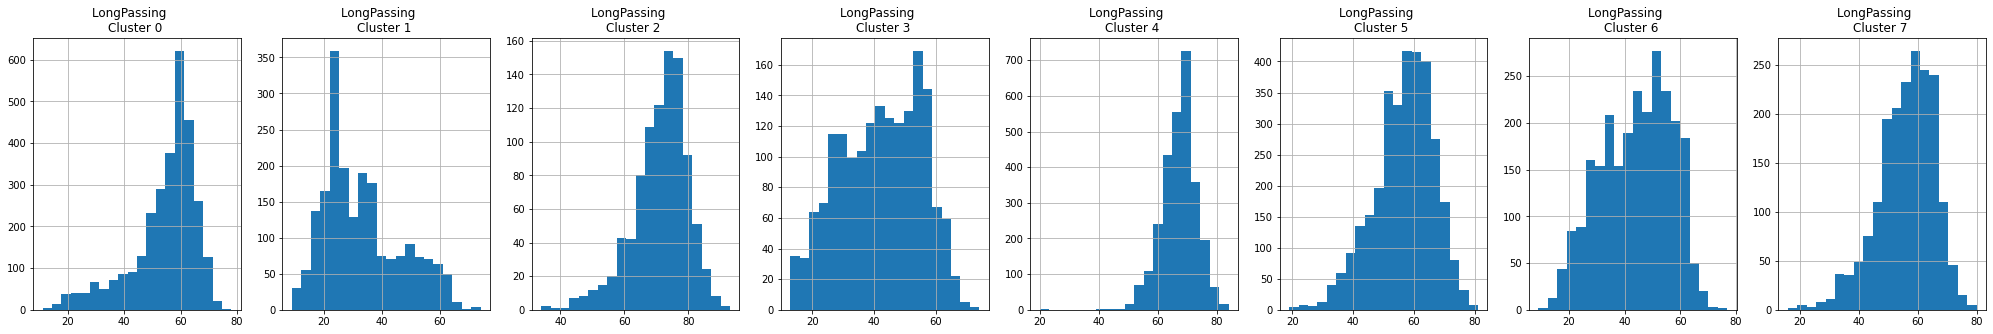

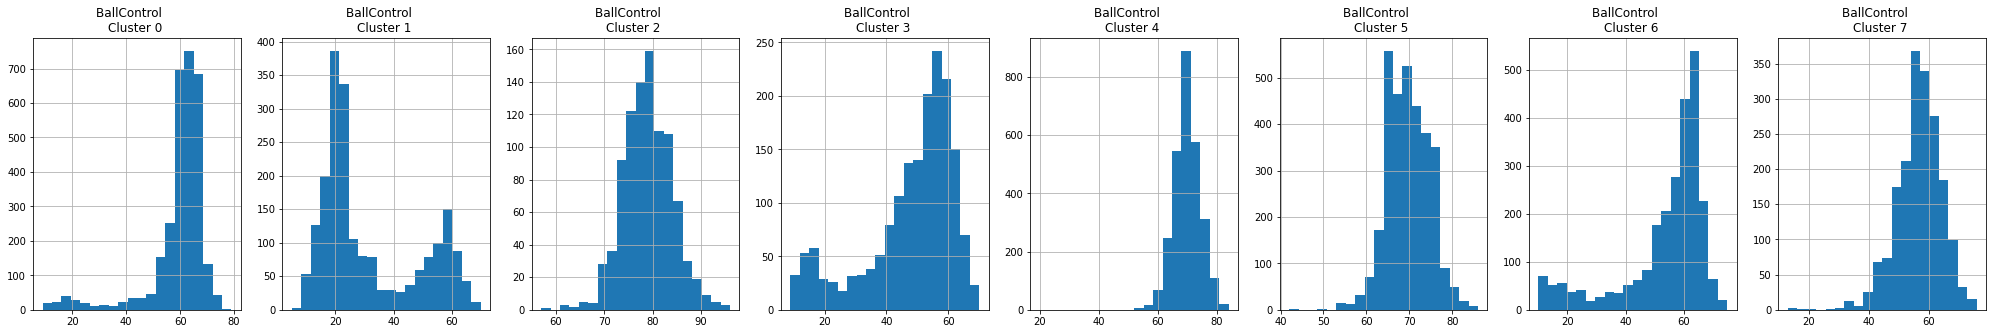

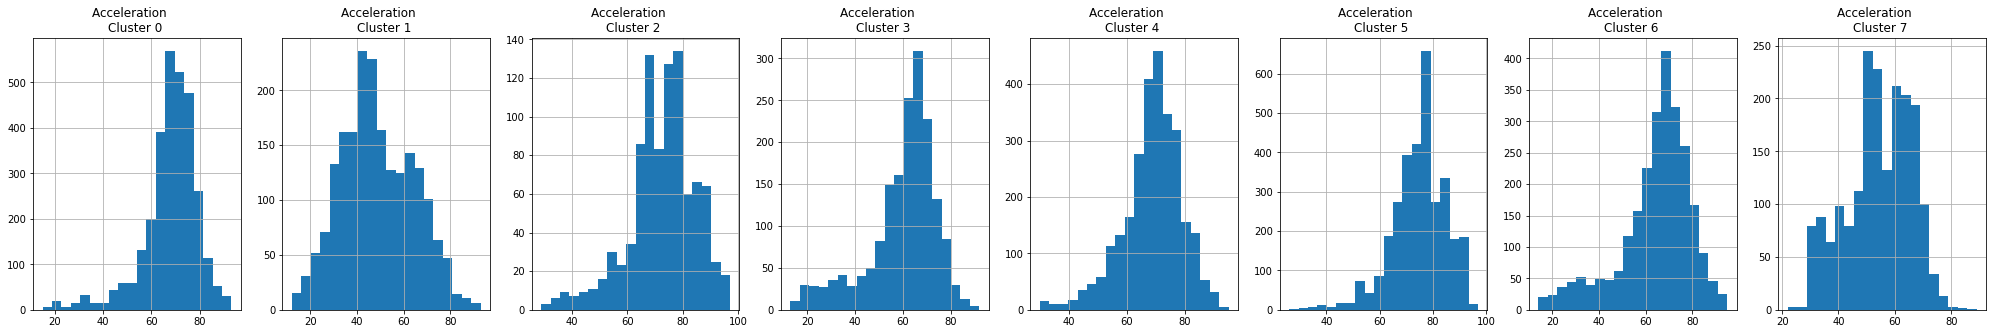

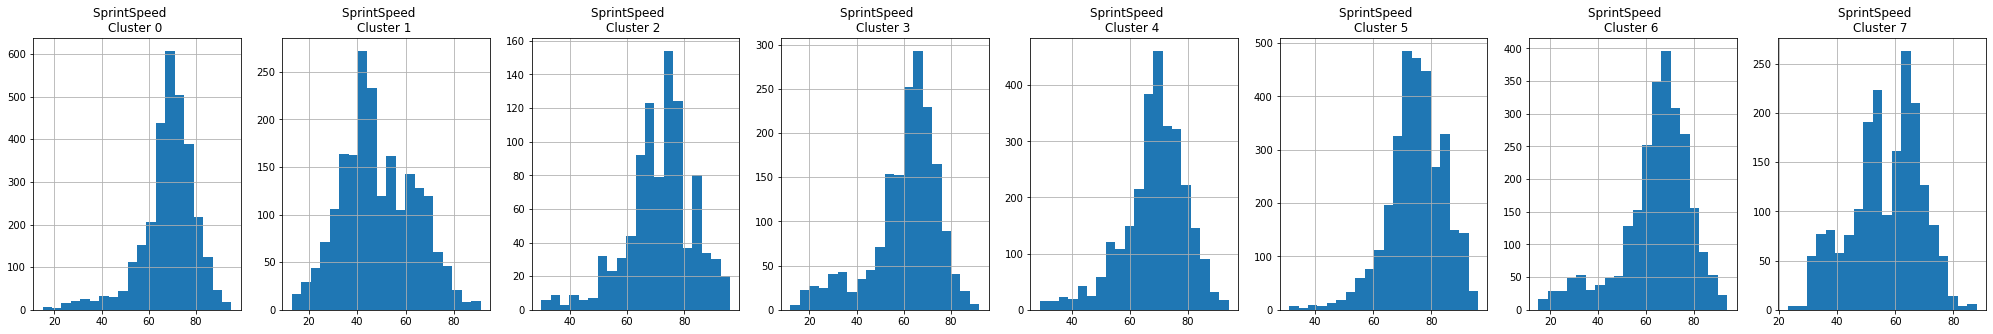

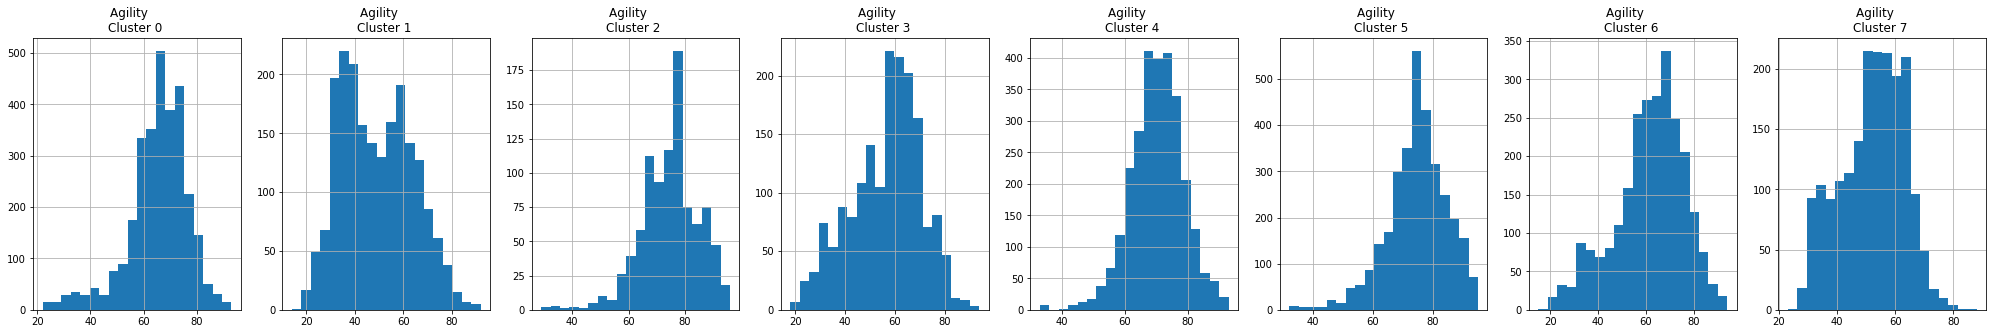

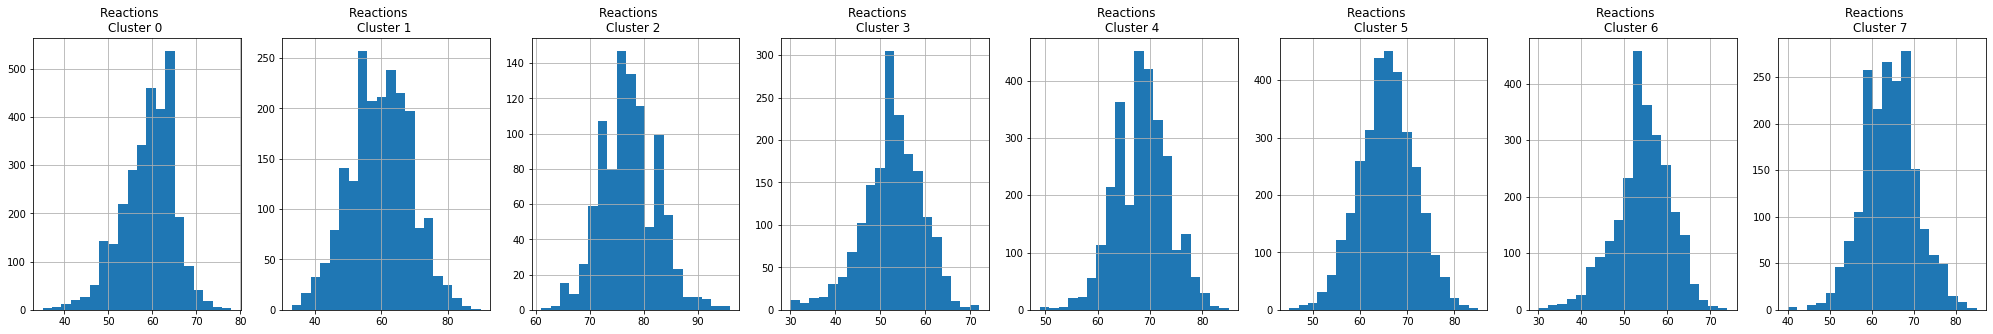

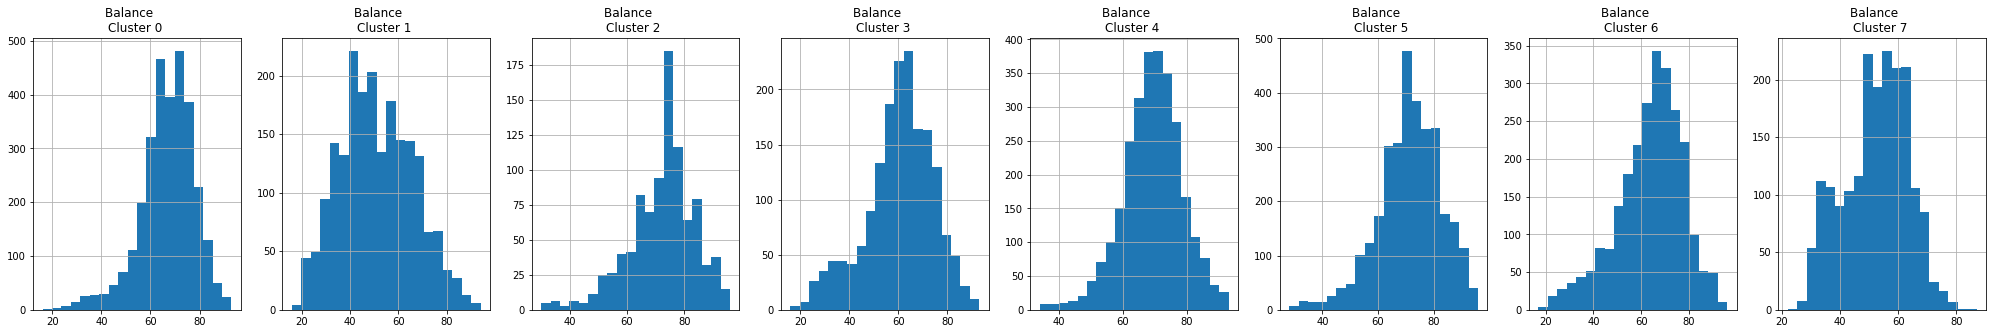

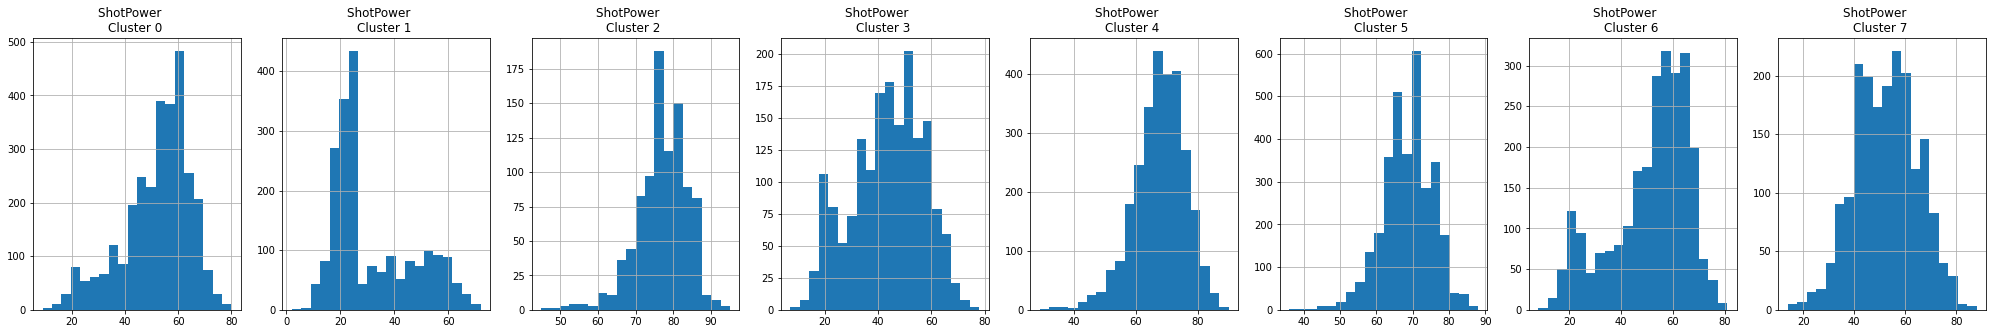

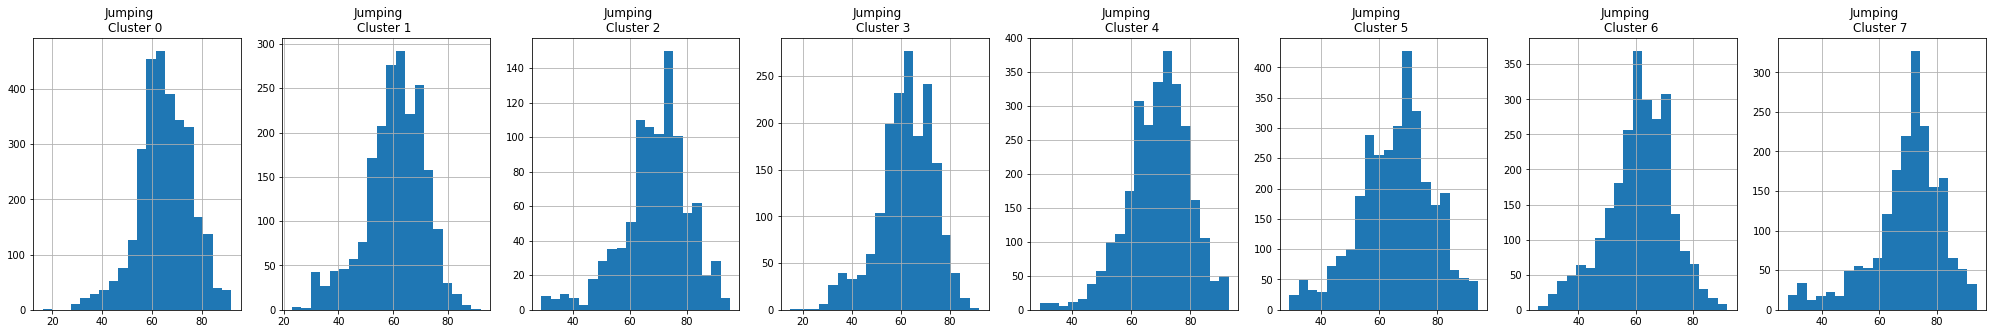

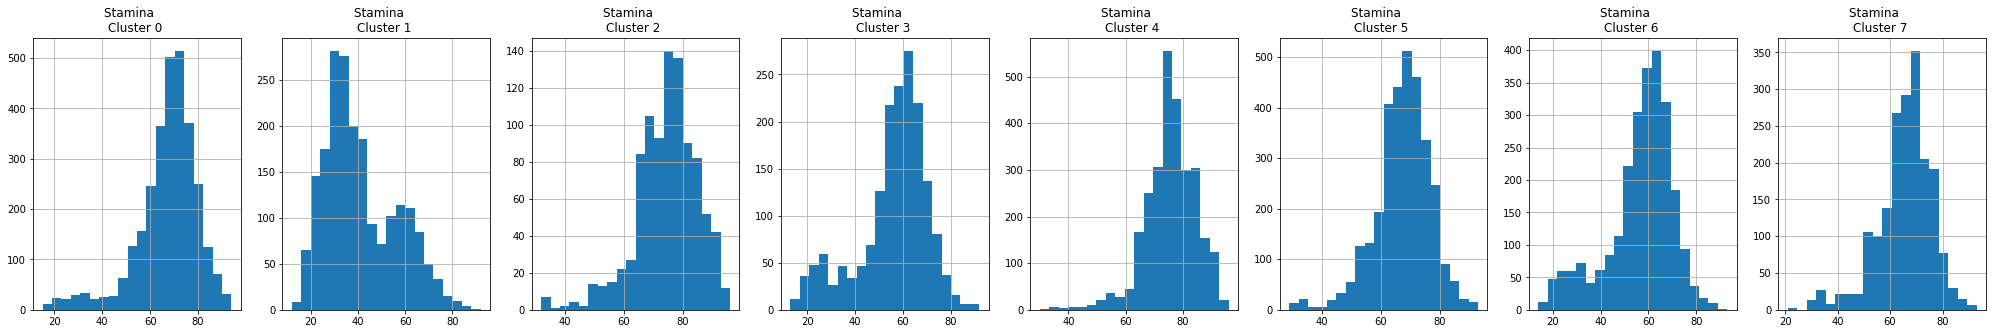

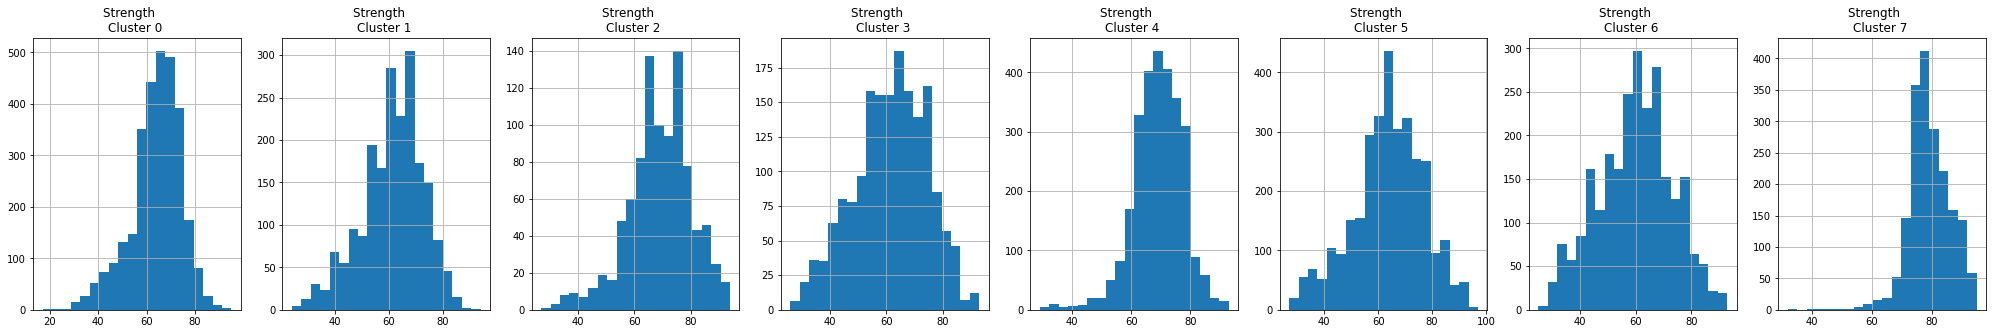

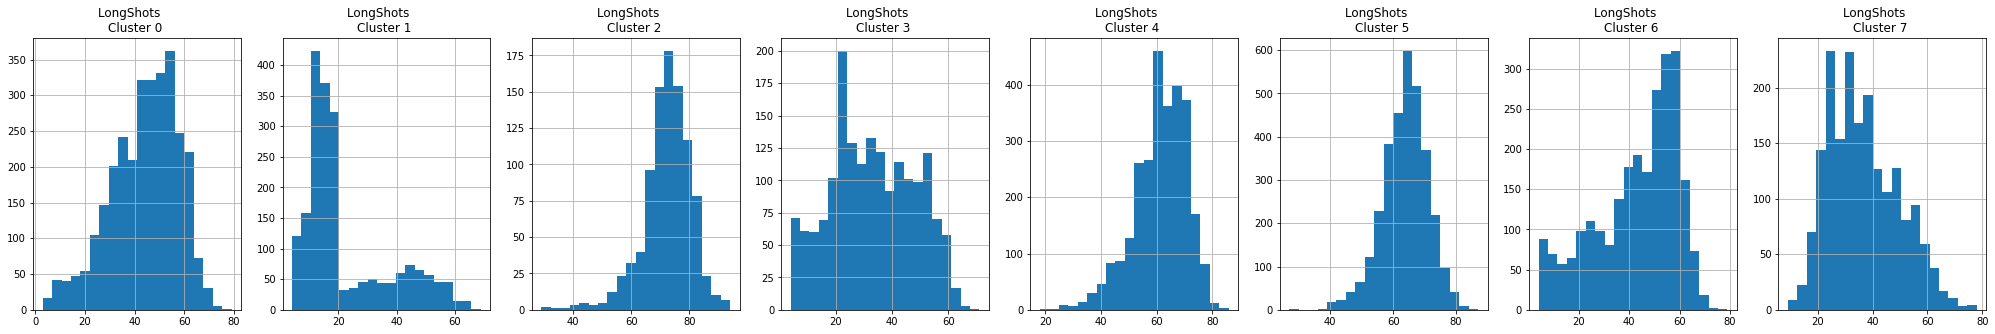

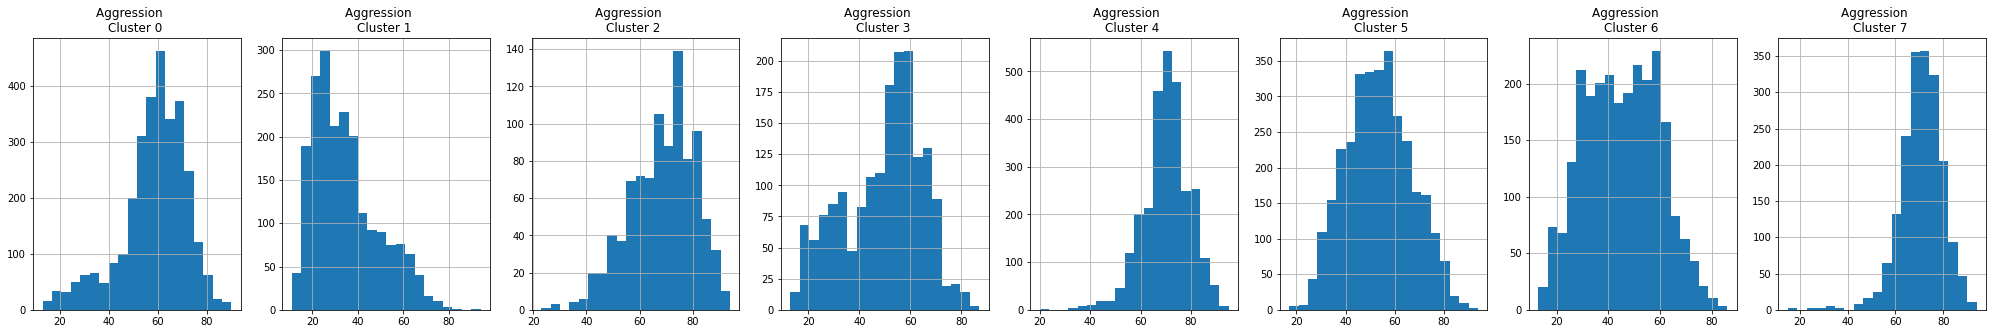

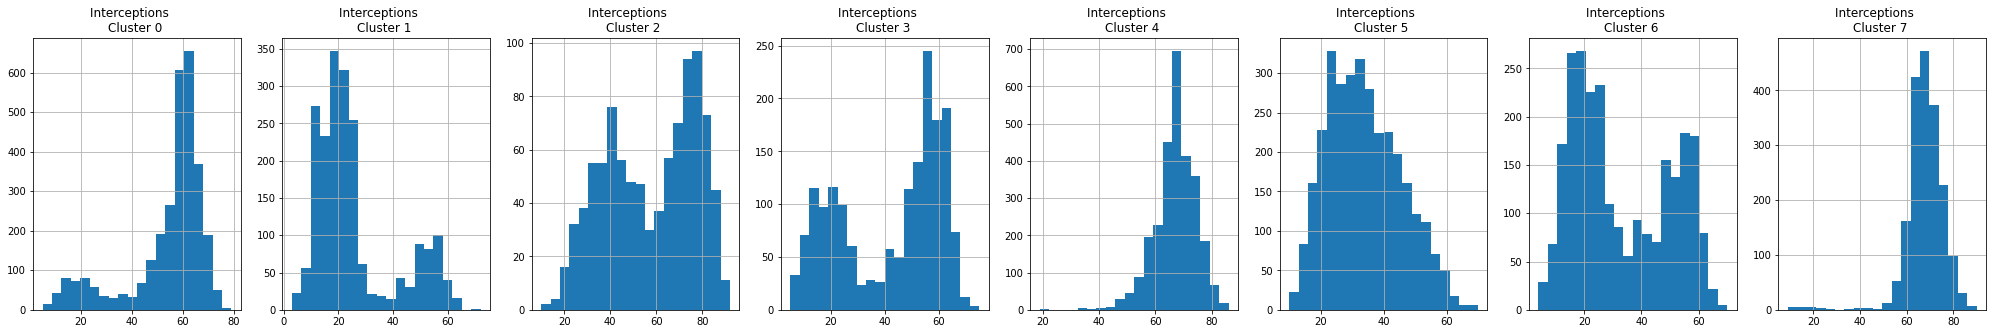

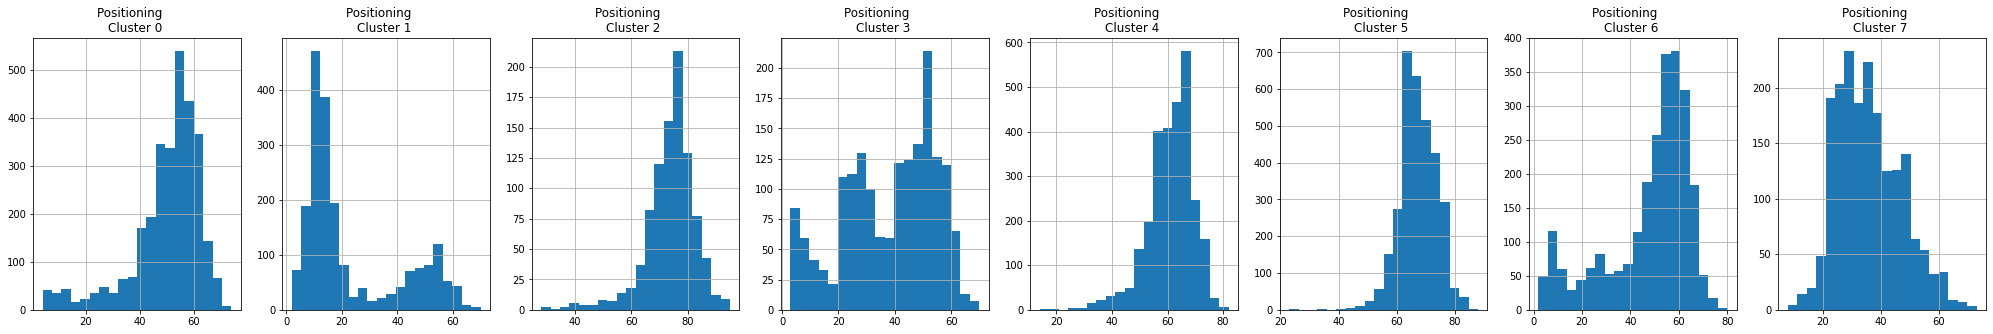

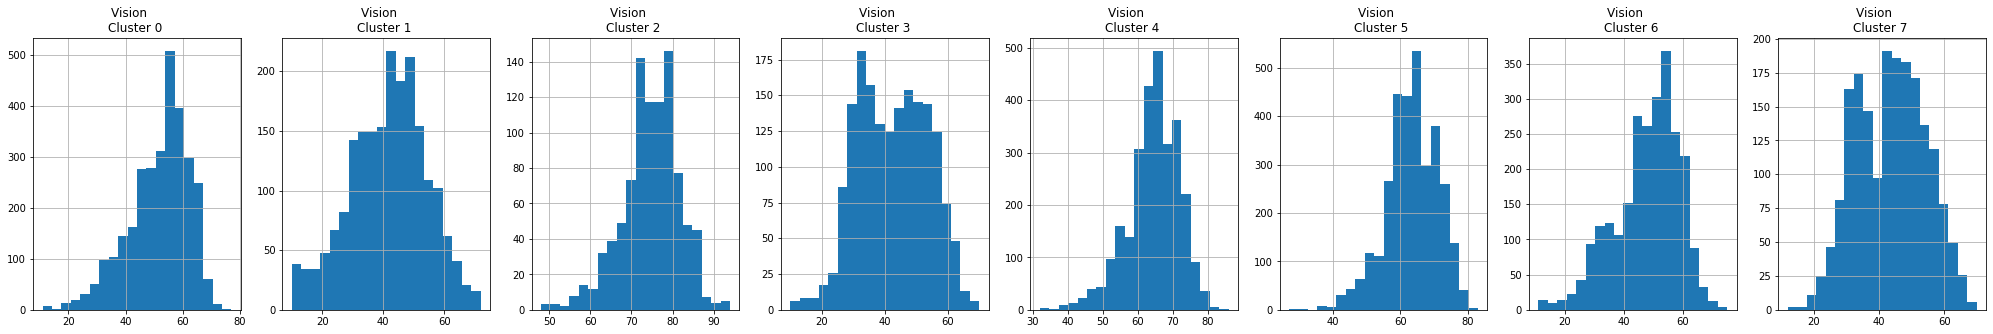

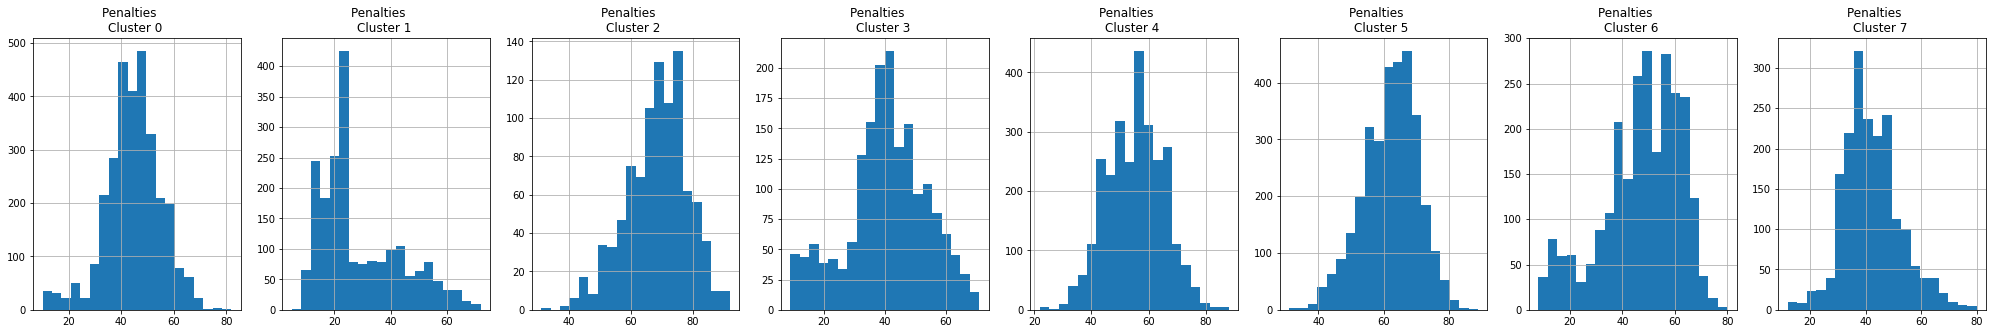

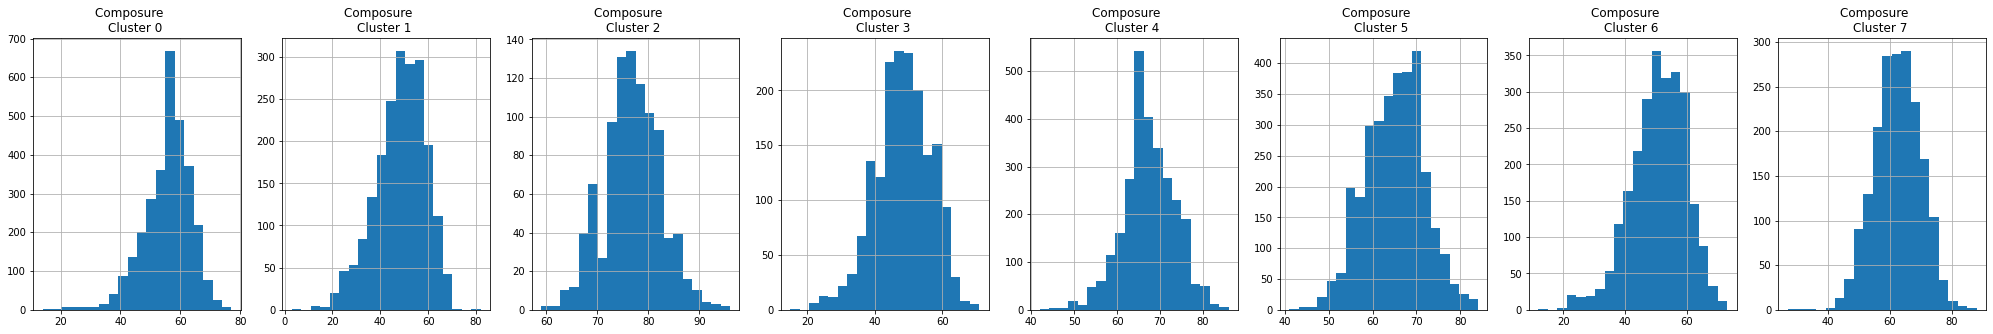

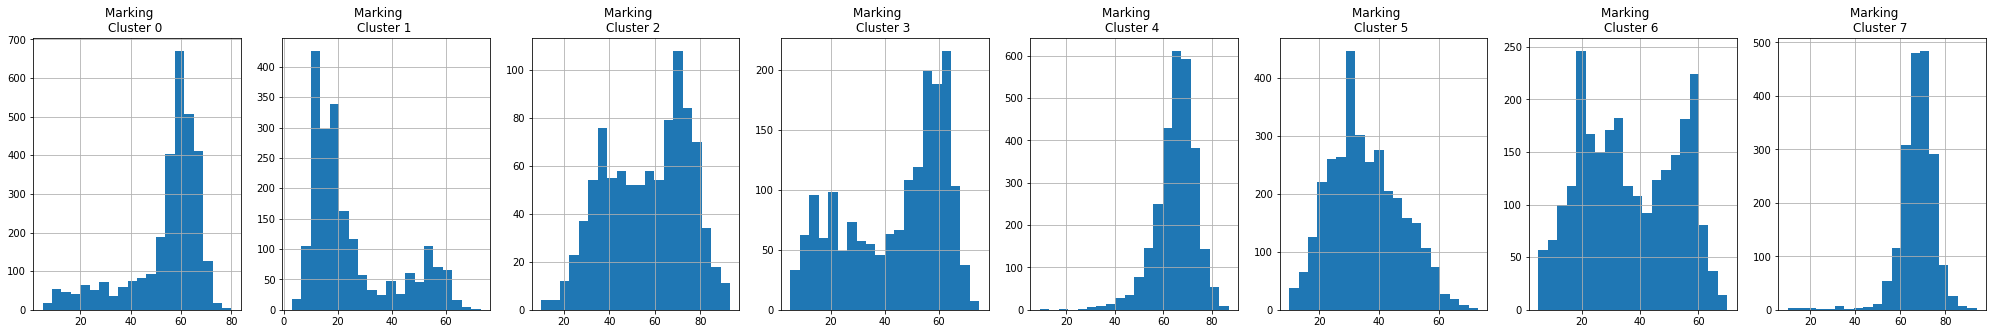

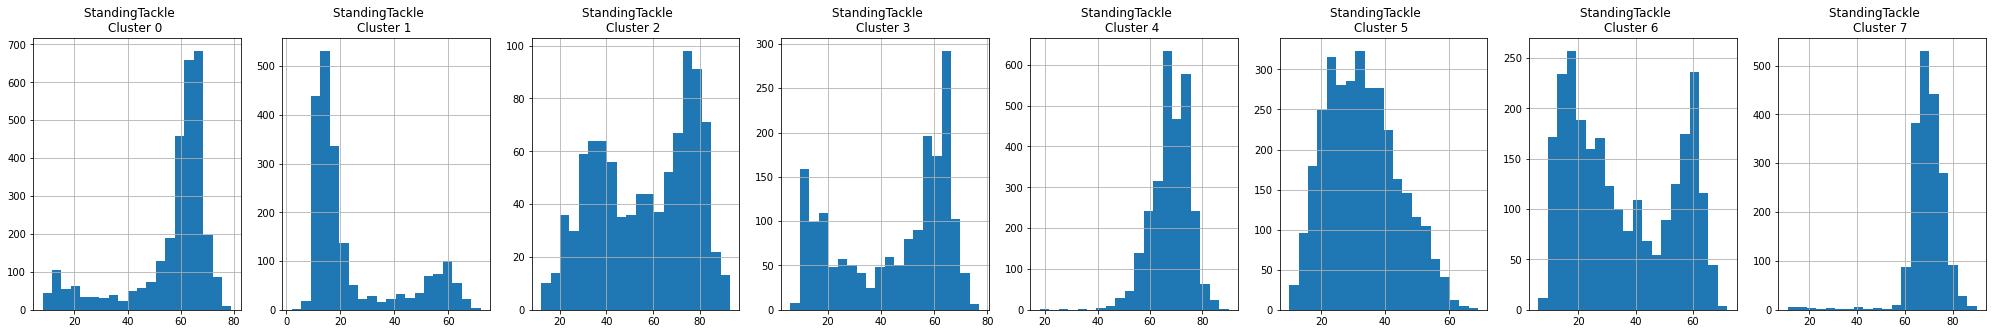

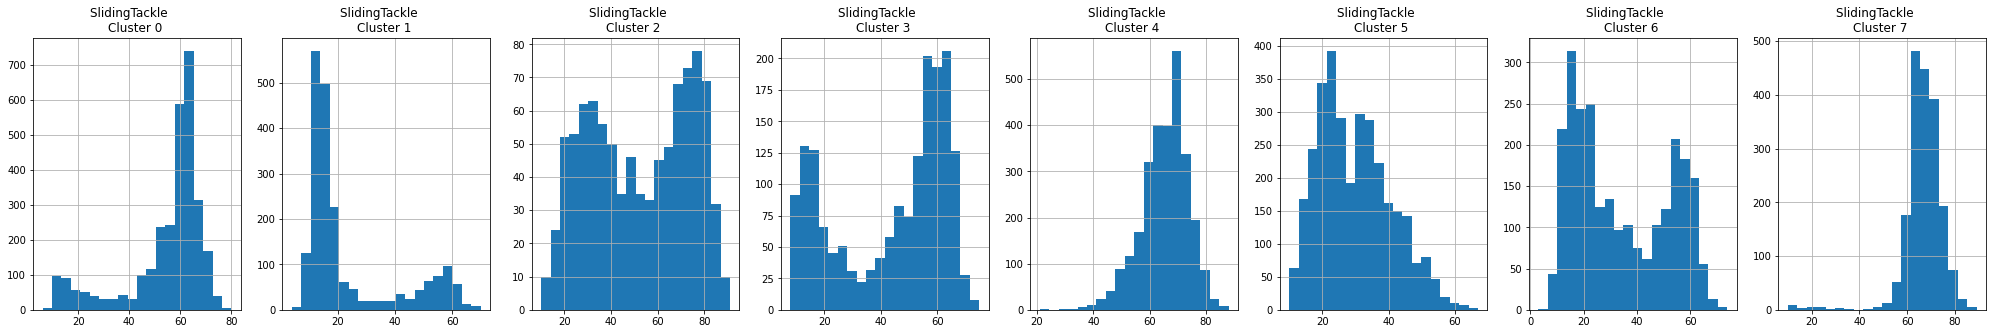

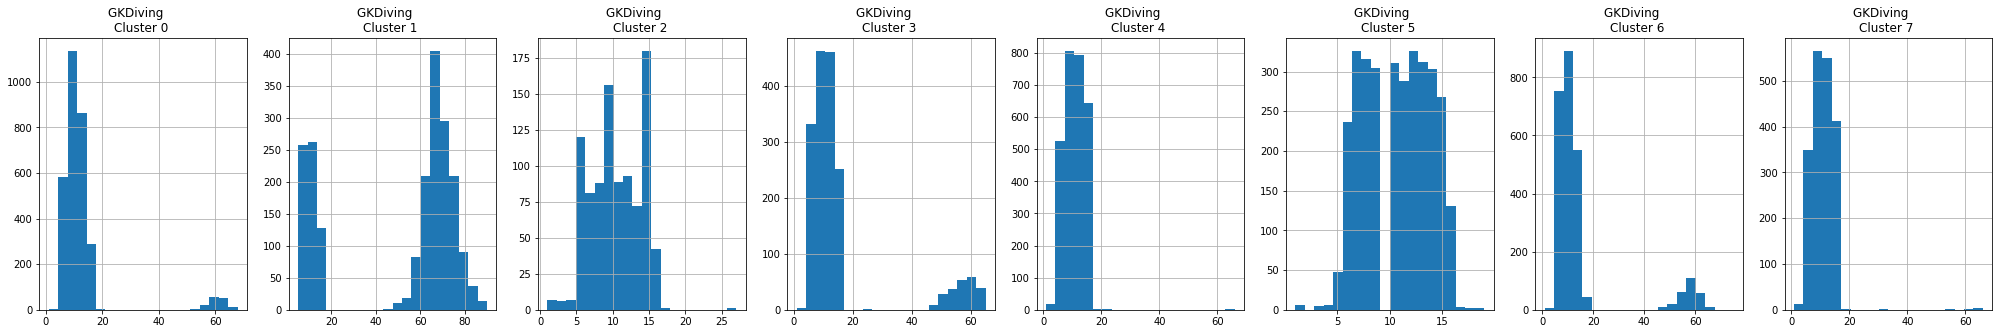

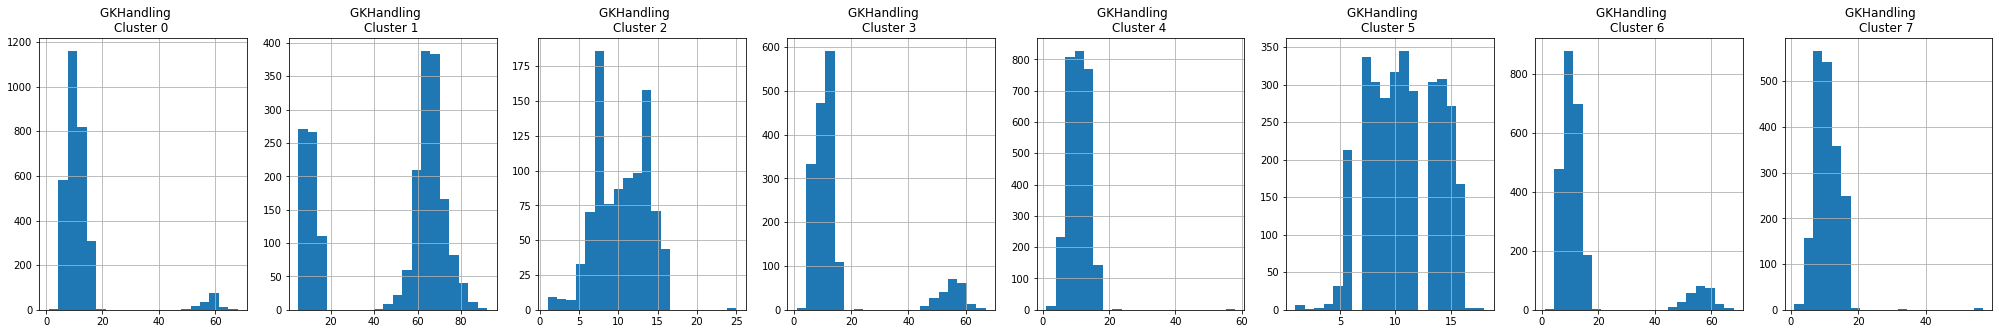

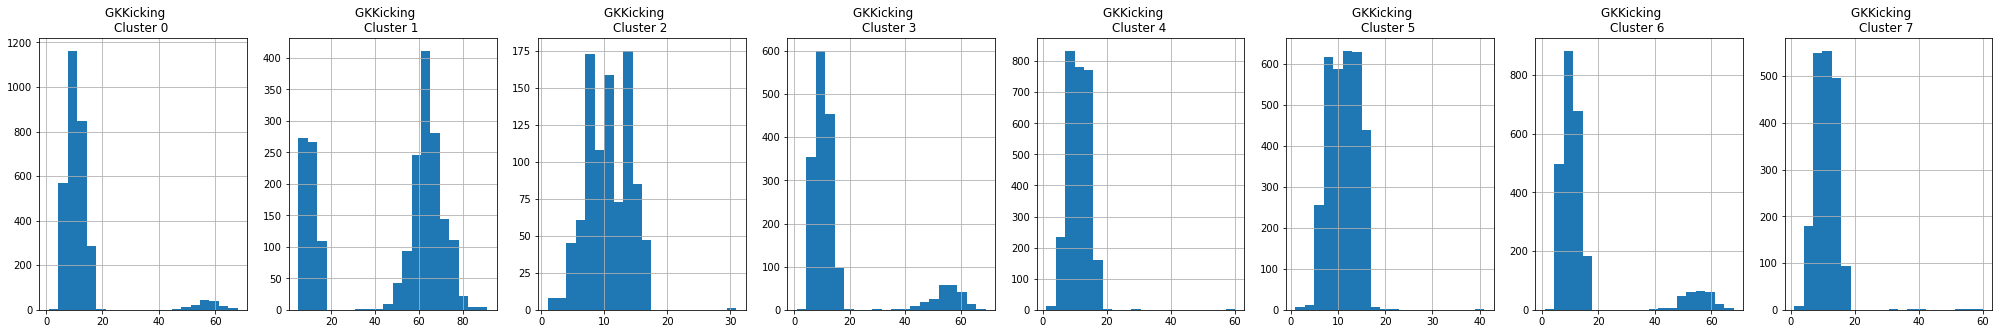

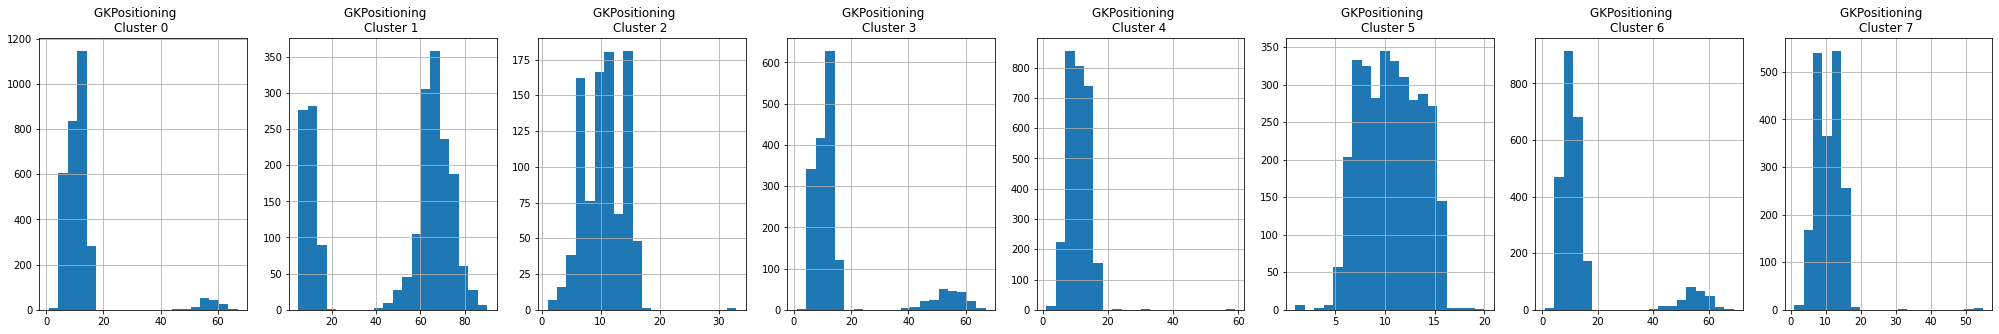

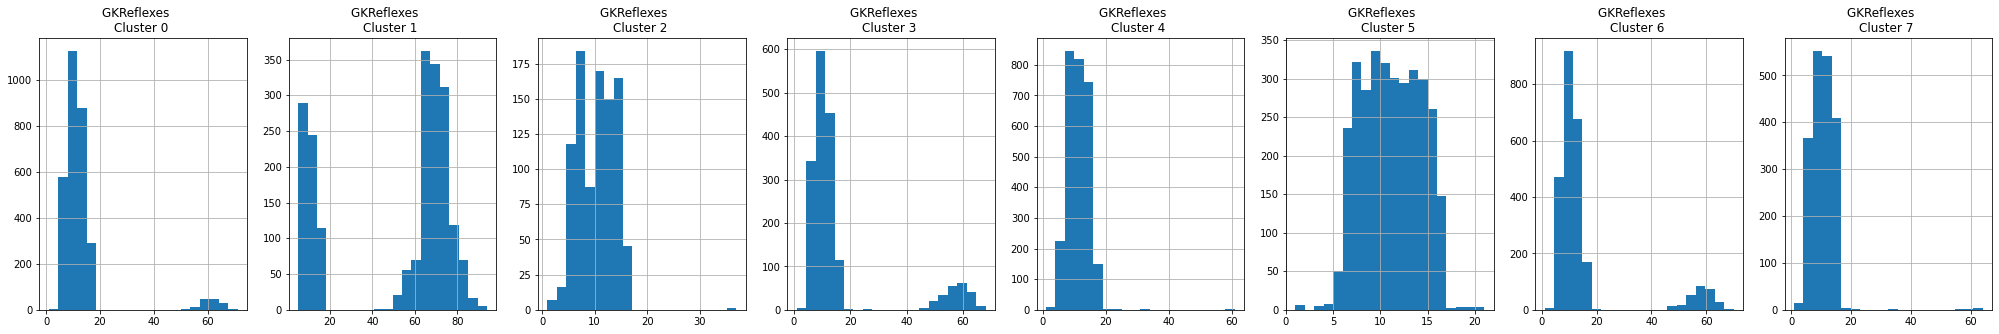

In [27]:
# Characteristics plotting

for i in playersN.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = players_cluster[players_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

In [28]:
# export to excel for further analysis
players_cluster.to_excel(excel_writer='Clustered.xlsx')

In [29]:
players.shape

(18159, 56)

In [33]:
# Obtain the principal components (We create to components that englobe the rest)
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(playersN_scaled)
principal_comp

array([[-10.16966298,  -5.14899639],
       [-10.21413653,  -3.67654142],
       [ -9.72360136,  -5.24582261],
       ...,
       [  3.57383097,  -2.76688765],
       [  3.46847046,  -2.69026878],
       [  3.00517184,   0.40546437]])

In [34]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data=principal_comp, columns=['PCA1', 'PCA2'])
pca_df.head()

,PCA1,PCA2
0,-10.169663,-5.148996
1,-10.214137,-3.676541
2,-9.723601,-5.245823
3,7.425186,-1.754208
4,-10.054058,-1.713465


In [35]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()

,PCA1,PCA2,cluster
0,-10.169663,-5.148996,2
1,-10.214137,-3.676541,2
2,-9.723601,-5.245823,2
3,7.425186,-1.754208,1
4,-10.054058,-1.713465,2


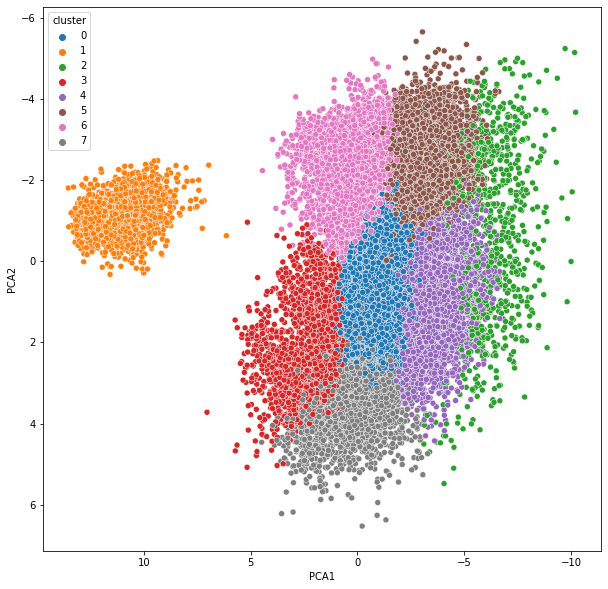

In [38]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=pca_df, palette='tab10')
ax.invert_xaxis()
ax.invert_yaxis()
# PCA1 is roughly inversely proportinal to overall skill
# PCA2 is roughly inversely porportional to how defensive a player is
# I flipped around the axis so it becomes more clear